<a href="https://colab.research.google.com/github/Dheerajnath/BDA-EXPT-1-C/blob/main/diagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving large_sales_data.csv to large_sales_data.csv


In [3]:
df = pd.read_csv('large_sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

In [5]:
df_2024 = df[df['Year'] == 2024]

In [6]:
monthly_profit = df_2024.groupby('Month')['Profit'].agg(['sum', 'mean'])

print("MONTH-WISE TOTAL & AVERAGE PROFIT (2024)")
print(monthly_profit)


MONTH-WISE TOTAL & AVERAGE PROFIT (2024)
             sum         mean
Month                        
April     730799  1014.998611
February  689548   990.729885
January   763909  1026.759409
March     701993   943.538978
May       100916  1051.208333


In [7]:
monthly_profit = df_2024.groupby('Month')['Profit'].sum()
lowest_profit_month = monthly_profit.idxmin()
lowest_profit_value = monthly_profit.min()

print("LOWEST PROFIT MONTH:", lowest_profit_month)
print("Profit:", lowest_profit_value)

LOWEST PROFIT MONTH: May
Profit: 100916


In [8]:
monthly_profit_df = df_2024.groupby('Month')['Profit'].agg(['sum', 'mean'])
lowest_month_avg_profit = monthly_profit_df.loc[lowest_profit_month, 'mean']

overall_avg_profit = df_2024['Profit'].mean()

print("AVERAGE PROFIT IN LOWEST PROFIT MONTH:", lowest_month_avg_profit)
print("OVERALL AVERAGE PROFIT:", overall_avg_profit)

difference = lowest_month_avg_profit - overall_avg_profit
print("DIFFERENCE (Lowest Month - Overall Avg):", difference)

AVERAGE PROFIT IN LOWEST PROFIT MONTH: 1051.2083333333333
OVERALL AVERAGE PROFIT: 995.7216666666667
DIFFERENCE (Lowest Month - Overall Avg): 55.486666666666565


In [9]:
worst_month_data = df_2024[df_2024['Month'] == lowest_profit_month]

worst_month_data.head()

,OrderID,Date,Region,Category,SubCategory,Sales,Profit,Quantity,CustomerType,PaymentMode,Year,Month
2904,2905,2024-05-01 00:00:00,North,Books,Chair,3919,2291,45,VIP,Cash,2024,May
2905,2906,2024-05-01 01:00:00,South,Food,Novels,6955,1010,9,Returning,UPI,2024,May
2906,2907,2024-05-01 02:00:00,East,Clothing,Laptop,1079,2881,2,VIP,Debit Card,2024,May
2907,2908,2024-05-01 03:00:00,North,Electronics,Snacks,1076,-150,32,VIP,Cash,2024,May
2908,2909,2024-05-01 04:00:00,North,Books,Table,9663,988,49,VIP,Wallet,2024,May


In [10]:
monthly_orders = df_2024.groupby('Month').size()

print("MONTH-WISE ORDERS (2024)")
print(monthly_orders)

MONTH-WISE ORDERS (2024)
Month
April       720
February    696
January     744
March       744
May          96
dtype: int64


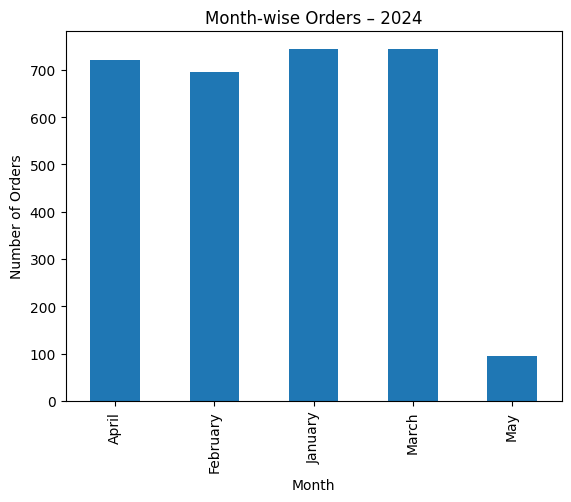

In [11]:
import matplotlib.pyplot as plt

plt.figure()
monthly_orders.plot(kind='bar')
plt.title('Month-wise Orders – 2024')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()